In [ ]:
eyes_training_imgs = '/content/drive/My Drive/dnn_dataset/ODIR-5K/Training Images'

cropped_images = '/content/drive/My Drive/dnn_dataset/ODIR-5K/Cropped_Training_Images'

eyes_training_imgs_edge = '/content/drive/My Drive/dnn_dataset/ODIR-5K/Training_images_4'

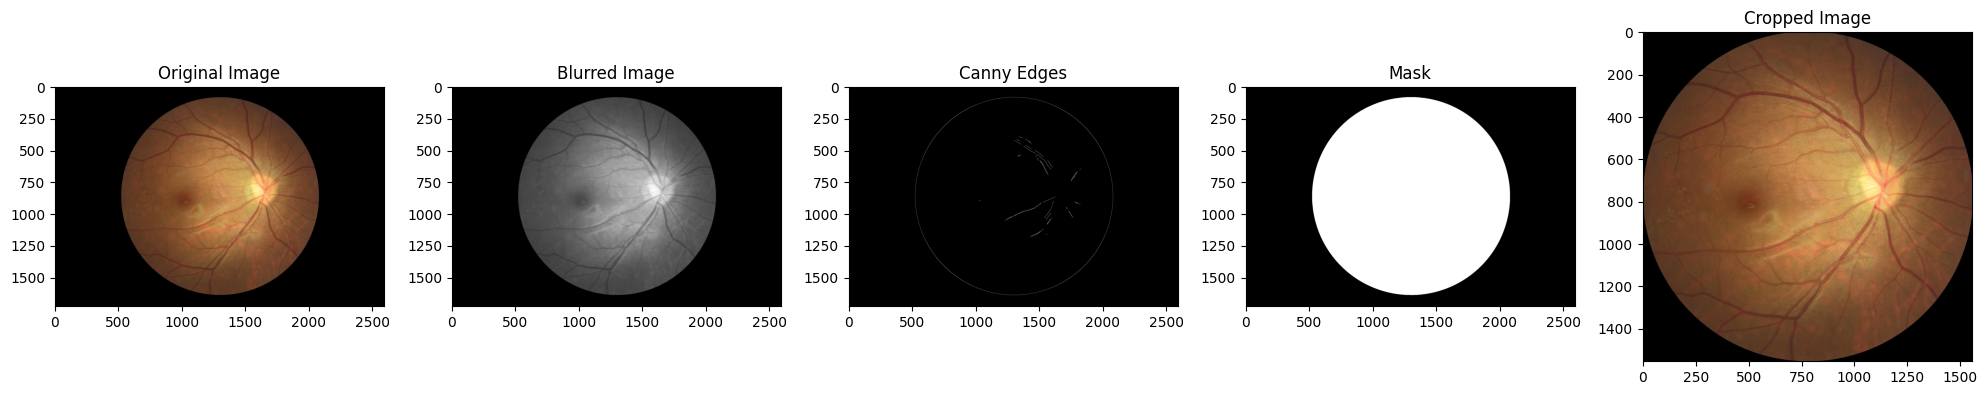

In [ ]:
#FINAL CROPING WITH EDGE DETECTION BOUNDING BOX BASED ON THE RADIUS

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny_edge_detection(frame):
    # Convert the frame to grayscale for edge detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and smoothen edges
    blurred = cv2.GaussianBlur(src=gray, ksize=(3, 5), sigmaX=0.5)

    # Perform Canny edge detection
    edges = cv2.Canny(blurred, 70, 135)

    return blurred, edges

# Specify the path to the training images folder
eyes_training_imgs = '/content/drive/My Drive/dnn_dataset/ODIR-5K/Training Images'

# Get a list of image filenames in the training images folder
image_filenames = [filename for filename in os.listdir(eyes_training_imgs) if filename.endswith(('.jpg', '.png', '.jpeg'))]

# Choose a random image from the list
random_image_filename = np.random.choice(image_filenames)
input_image_path = os.path.join(eyes_training_imgs, random_image_filename)

# Load the random image
image = cv2.imread(input_image_path)

# Apply Canny edge detection
blurred, edges = canny_edge_detection(image)

# Find contours in the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the contour with the largest area (assuming it corresponds to the edges)
largest_contour = max(contours, key=cv2.contourArea)

# Create a mask using the largest contour
mask = np.zeros_like(edges)
cv2.drawContours(mask, [largest_contour], 0, 255, thickness=cv2.FILLED)

# Bitwise AND the mask with the original image to extract the region around the edges
result = cv2.bitwise_and(image, image, mask=mask)

# Find the minimum enclosing circle around the contour
(x, y), radius = cv2.minEnclosingCircle(largest_contour)
center = (int(x), int(y))
radius = int(radius)

# Crop the region around the edges using the enclosing circle
cropped_image = result[int(y - radius):int(y + radius), int(x - radius):int(x + radius)]

# Display the original image, blurred image, edges, mask, and the cropped image
plt.figure(figsize=(20, 5))

# Original Image
plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Blurred Image
plt.subplot(1, 5, 2)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image')

# Canny Edges
plt.subplot(1, 5, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')

# Masked Image
plt.subplot(1, 5, 4)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

# Cropped Image
plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')

plt.tight_layout()
plt.show()


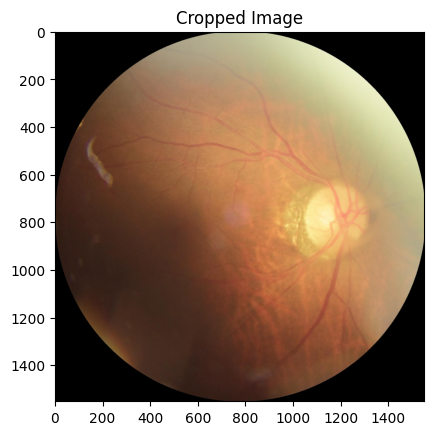

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def crop_image_with_edge_detection(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Apply Canny edge detection
    blurred, edges = canny_edge_detection(image)

    # Find contours in the edges
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the contour with the largest area (assuming it corresponds to the edges)
    largest_contour = max(contours, key=cv2.contourArea)

    # Create a mask using the largest contour
    mask = np.zeros_like(edges)
    cv2.drawContours(mask, [largest_contour], 0, 255, thickness=cv2.FILLED)

    # Bitwise AND the mask with the original image to extract the region around the edges
    result = cv2.bitwise_and(image, image, mask=mask)

    # Find the minimum enclosing circle around the contour
    (x, y), radius = cv2.minEnclosingCircle(largest_contour)
    center = (int(x), int(y))
    radius = int(radius)

    # Crop the region around the edges using the enclosing circle
    cropped_image = result[int(y - radius + 1):int(y + radius - 1), int(x - radius + 1):int(x + radius - 1)].copy()

    return cropped_image



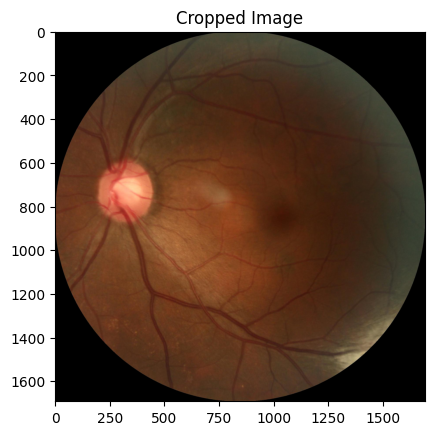

In [ ]:
eyes_training_imgs = '/content/drive/My Drive/dnn_dataset/ODIR-5K/Training Images'
image_filenames = [filename for filename in os.listdir(eyes_training_imgs) if filename.endswith(('.jpg', '.png', '.jpeg'))]
random_image_filename = np.random.choice(image_filenames)
input_image_path = os.path.join(eyes_training_imgs, random_image_filename)

cropped_image = crop_image_with_edge_detection(input_image_path)

# Display the cropped image
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.show()
